# Customer Segmentation with RBM

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Generate a synthetic customer dataset
np.random.seed(0)
data = {
    'age': np.random.randint(18, 70, 1000),
    'annual_income': np.random.randint(20000, 150000, 1000),
    'spending_score': np.random.randint(1, 100, 1000),
    'loyalty_score': np.random.randint(1, 100, 1000)
}
df = pd.DataFrame(data)


In [2]:

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Define and train the RBM model
rbm = BernoulliRBM(n_components=5, learning_rate=0.01, n_iter=20, random_state=0)
rbm.fit(scaled_data)

# Get the features learned by RBM
rbm_features = rbm.transform(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


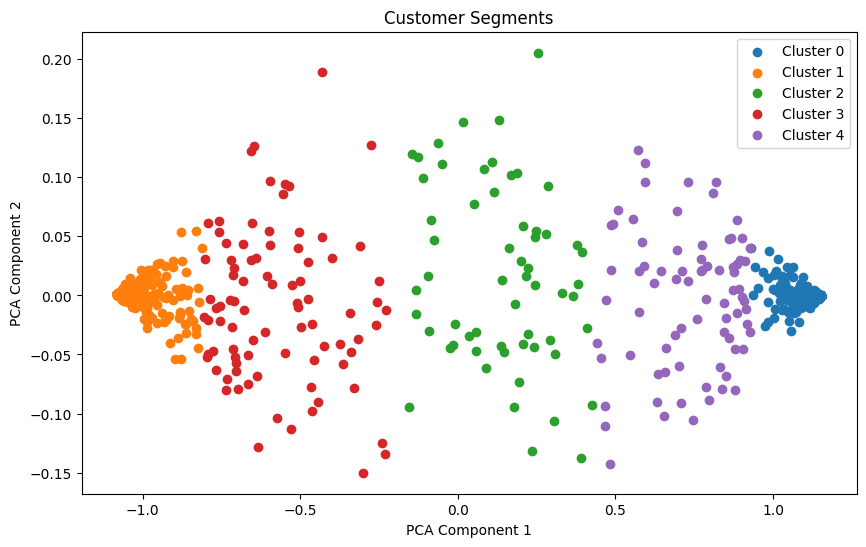

In [3]:

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(rbm_features)

# Add clusters to the original dataframe
df['cluster'] = clusters

# Visualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(rbm_features)

plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(pca_result[clusters == cluster, 0], pca_result[clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
